<h1 align="center">Mathematical Methods In Engineering - 25872</h1>
<h4 align="center">Dr. Amiri</h4>
<h4 align="center">Sharif University of Technology, Fall 2023</h4>
<h4 align="center">Python Assignment 3</h4>
<h5 align="center"><font color="cyan"> Feel free to contact TA team for any possible questions about the assignment </font>
 </h5>
<h5 align="center"> <font color="cyan"> Questions 1,2: @mh_momeni  -  Question 2,3: @Mahdi_h721 </font> </h5>


You should write your code in the <font color='green'>Code Cell</font> and then run the <font color='green'>Evaluation Cell</font> to check the correctness of your code.<br>
<font color='red'>**Please do not edit the codes in the Evaluation Cells.**</font>

##  Q1. Implementing QR Factorization <sub><sup>``(40 pt.)``</sup></sub>

>In this question, we are going to use QR factorization in computing eigenvalues. It is an important building block in numerical linear algebra. Recall that for any matrix $A$
, $A=QR$
 where $Q$
 is orthogonal and $R$
 is upper-triangular.

 **Reminder**: The QR algorithm, uses the QR decomposition, but don't confuse the two.

In [3]:
import numpy as np
np.set_printoptions(suppress=True, precision=4)

In [4]:
n = 5
A = np.random.rand(n,n)
npQ, npR = np.linalg.qr(A)

Check that Q is orthogonal:


In [5]:
np.allclose(np.eye(n), npQ @ npQ.T), np.allclose(np.eye(n), npQ.T @ npQ)

(True, True)

Check that R is triangular

In [6]:
def isuppertriangular(M):
    for i in range(1, len(M)):
        for j in range(0, i):
            if(M[i][j] != 0): 
                    return False
    return True

if isuppertriangular(npR):
    print ("Yes")
else:
    print ("No")

Yes


### Gram-Schmidt

#### Classical Gram-Schmidt (unstable)

For each $j$
, calculate a single projection

$$v_j=P_ja_j$$

where $P_j$
 projects onto the space orthogonal to the span of $q_1,…,q_{j−1}$
.

In [7]:
def cgs(A):
    m, n = A.shape
    Q = np.zeros([m,n], dtype=np.float64)
    R = np.zeros([n,n], dtype=np.float64)
    ##Your Code start here
    for k in range(n):
        Q[:, k] = A[:, k]
        for i in range(k):
            R[i, k] = np.dot(Q[:, i], A[:, k])
            Q[:, k] -= R[i, k] * Q[:, i]
        R[k, k] = np.linalg.norm(Q[:, k])
        Q[:, k] /= R[k, k]
    ##Your Code ends here
    return Q, R

In [8]:
Q, R = cgs(A)
np.allclose(A, Q @ R)

True

Check if Q is unitary:

In [9]:
np.allclose(np.eye(len(Q)), Q.dot(Q.T))

True

### Modified Gram-Schmidt (optional)

Classical (unstable) Gram-Schmidt: for each $j$
, calculate a single projection
$$v_j=P_ja_j$$
where $P_j$
 projects onto the space orthogonal to the span of $q_1,…,q_{j−1}$
.

Modified Gram-Schmidt: for each $j$
, calculate $j−1$
 projections
$$P_j=P_{⊥q_{j−1}⋯⊥q_2⊥q_1}$$

In [10]:
n = 3
A = np.random.rand(n,n).astype(np.float64)

In [11]:
def mgs(A):
    V = A.copy()
    m, n = A.shape
    Q = np.zeros([m,n], dtype=np.float64)
    R = np.zeros([n,n], dtype=np.float64)
    ##Your Code start here
    for j in range(n):
        V[:, j] = A[:, j]
        for i in range(j):
            R[i, j] = np.dot(Q[:, i], V[:, j])
            V[:, j] = V[:, j] - R[i, j] * Q[:, i]
        R[j, j] = np.linalg.norm(V[:, j])
        Q[:, j] = V[:, j] / R[j, j]
    ##Your Code ends here
    return Q, R

In [12]:
Q, R = mgs(A)
np.allclose(np.eye(len(Q)), Q.dot(Q.T.conj()))

True

In [13]:
np.allclose(A, np.matmul(Q,R))

True

### Classical vs Modified Gram-Schmidt

In this part, we want to construct a square matrix $A$ with random singular vectors and widely varying singular values spaced by factors of 2 between $2^{−1}$
 and $2^{−(n+1)}$

In [14]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline

In [15]:
n = 100
U, X = np.linalg.qr(np.random.randn(n,n))   # set U to a random orthogonal matrix
V, X = np.linalg.qr(np.random.randn(n,n))   # set V to a random orthogonal matrix
S = np.diag(np.power(2,np.arange(-1,-(n+1),-1), dtype=float))  # Set S to a diagonal matrix w/ exp
                                                              # values between 2^-1 and 2^-(n+1)

In [16]:
A = np.matmul(U,np.matmul(S,V))
QC, RC = cgs(A)
QM, RM = mgs(A) # if you don't complete the mgs function, comment this line

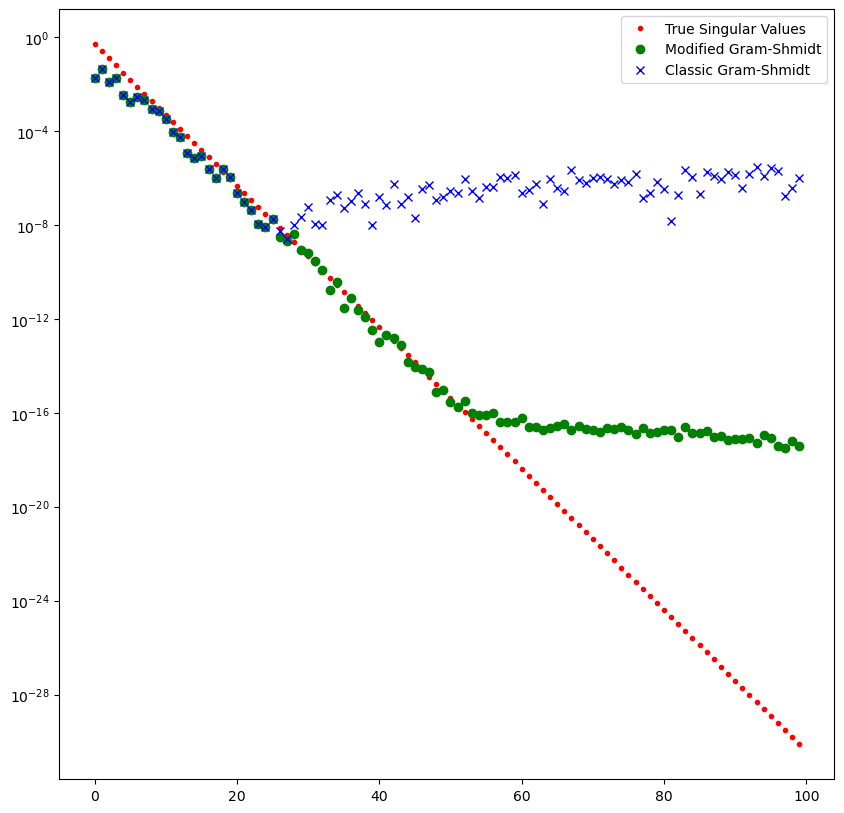

In [17]:
plt.figure(figsize=(10,10))
plt.semilogy(np.diag(S), 'r.', label="True Singular Values")
plt.semilogy(np.diag(RM), 'go', label="Modified Gram-Shmidt")
plt.semilogy(np.diag(RC), 'bx', label="Classic Gram-Shmidt")
plt.legend()
rcParams.update({'font.size': 18})

### Eigenvalue Decomposition using QR Factorization

Use the QR algorithm (or QR method) to get the eigenvalues of matrix $A$. Do 100 iterations, and print out the 1st, 5th, 10th, 20th and 100th iteration.

 **Reminder**: The QR algorithm (or QR method), uses the QR factorization, but don't confuse the two.

In [18]:
##Your Code start here 
def qr_algorithm(A, iterations):
    
    curr_matrix = A
    eigenvalues = []
    
    for i in range(iterations):
        Q, R = np.linalg.qr(curr_matrix)
        next_matrix = R @ Q
        eigenvalues.append(np.diag(next_matrix))
        curr_matrix = next_matrix
    
    return eigenvalues
##Your Code ends here

In [19]:
A = np.array([1.0, -1.0, 0.0, 0.0, -1.0, 1.0, -1.0, 0.0, 0.0, -1.0, 2.0, 0.0, 0.0, 0.0, 0.0, 3.0]).reshape((4, 4))
print("The matrix: \n", A)

print("\n --- Built-in ---")
print(np.linalg.eig(A)[0])
##Your Code start here
eigenvalues = qr_algorithm(A, 100)
print("1st iteration:", np.sort(eigenvalues[0]))
print("5th iteration:", np.sort(eigenvalues[4]))
print("10th iteration:", np.sort(eigenvalues[9]))
print("20th iteration:", np.sort(eigenvalues[19]))
print("100th iteration:", np.sort(eigenvalues[99]))
##Your Code ends here

The matrix: 
 [[ 1. -1.  0.  0.]
 [-1.  1. -1.  0.]
 [ 0. -1.  2.  0.]
 [ 0.  0.  0.  3.]]

 --- Built-in ---
[-0.247   1.445   2.8019  3.    ]
1st iteration: [0. 2. 2. 3.]
5th iteration: [-0.247   1.4541  2.7929  3.    ]
10th iteration: [-0.247   1.4451  2.8019  3.    ]
20th iteration: [-0.247   1.445   2.8019  3.    ]
100th iteration: [-0.247   1.445   2.8019  3.    ]


##  Q2. SVD & Image processing <sub><sup>``(30 pt.)``</sup></sub>

> In this question, we are going to investigate the use of SVD as a tool to obtain the basis of the matrix in digital image processing.
The first issue we will examine is image compression. For this purpose, in general, we can consider the information inside the image as a data matrix, then find a suitable basis for this information matrix and by depicting the primary matrix on the more important basis vectors and keeping the necessary information to show the initial image with less information.
This process results in image compression. It should be noted that for simplicity, the images we are examining in this exercise are in black and white.
>With the help of SVD, we can find a basis for the column space of the image matrix that we want, so that the columns of the image matrix have the highest correlation with the basis vectors.
>On the other hand, if these bases are considered in descending order of the size of the singular values, they will contain the most general information of the columns of the image, so by keeping only r initial columns of the found bases (U) along with the combined vectors (V) and the singular values (Σ) corresponding to them, we can retain the image's overall image with a good approximation.
>From an expert point of view, the reconstruction is actually a lower-order reconstruction of the primary matrix.
In this view, the value of r is the parameter to control the amount of compression we want.

###  part 1

In this part, the compression operation is performed on the input black and white image with the help of SVD analysis. One of the criteria for comparing the initial and final image is the PSNR criterion. Research about this criterion and draw the PSNR diagram in terms of different r. Then compare the results with the diagram by giving some test inputs and plotting the outputs.
One of the inputs you give to the function should be the image pic.jpg.

Answer:
PSNR: (peak signal)/(noise) -> measure the quality of an image reconstruction compared to the original image

As we can see, by increasing r the quality of image gets higher. This increase of quality by growth of r is huge (0 =< r =< 20) but after that, PSNR (dB) does increase but not by much (21 =< r =< 780). And again we see a huge increasing growth in PSNR when r is almost equal to rank of image.

In [34]:
##Your Code start here
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color
def myFunction(name):
    img = io.imread(name)
    img = color.rgb2gray(img)
    U, S, V = np.linalg.svd(img)
    psnr_list = []
    for r in range(1, min(U.shape[1], V.shape[0]) + 1):
        U_r = U[:, :r]
        S_r = np.diag(S[:r])
        V_r = V[:r, :]
        img_r = U_r @ S_r @ V_r
        mse = np.mean((img - img_r) ** 2)
        psnr = 10 * np.log10(1 / mse)
        psnr_list.append(psnr)
    plt.plot(range(1, len(psnr_list) + 1), psnr_list)
    plt.xlabel('r')
    plt.ylabel('PSNR (dB)')
    plt.title('PSNR vs r')
    plt.show()

    r_values = [1, 5, 10, 20, 50, 100]
    #plt.figure(figsize=(12, 8))
    plt.subplot(2, 4, 1)
    plt.imshow(img, cmap='gray')
    plt.title('Original image')
    plt.axis('off')
    for i, r in enumerate(r_values):
        U_r = U[:, :r]
        S_r = np.diag(S[:r])
        V_r = V[:r, :]
        img_r = U_r @ S_r @ V_r
        plt.subplot(2, 4, i + 2)
        plt.imshow(img_r, cmap='gray')
        plt.title(f'r = {r}, PSNR = {psnr_list[r-1]:.2f} dB')
        plt.axis('off')
    plt.tight_layout()
    plt.show()
##Your Code ends here

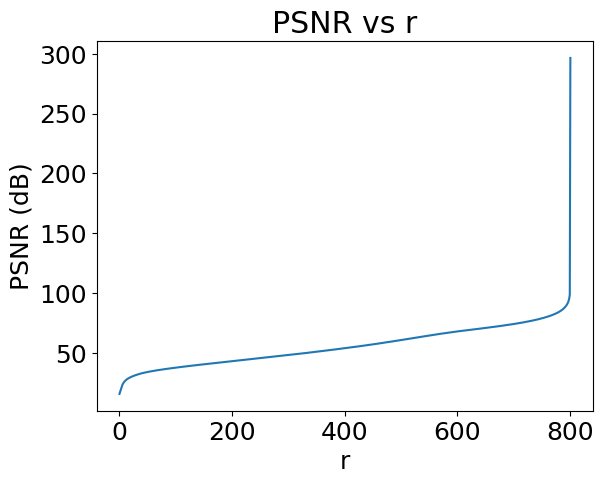

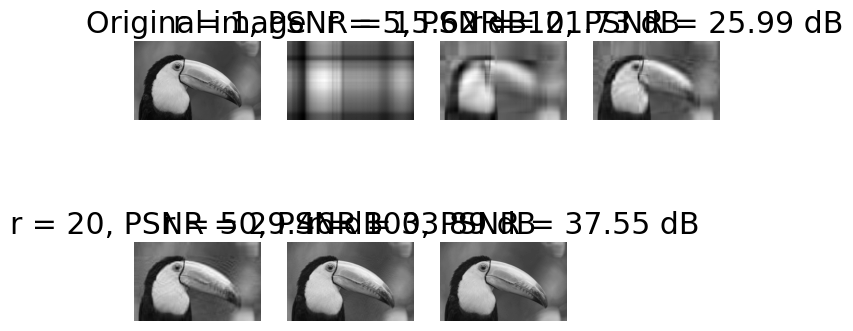

In [35]:
myFunction('pic.jpg')

###  part 2

Another issue that we can explore with a similar idea of applying base transform is removing noise from images. In the condition that the noise in the image is uniform and in such a way that it does not distort the general information in the image. from the point of view of SVD, according to the examination of the general information, the direction of the image vector on bases with larger singular values has not changed much, and removing the information related to Examining general information to vectors with less importance can remove noise and keep the main information of the image.
In this part, add two different noises salt and pepper and Gaussian noise with a desired and appropriate range to the image pic.jpg so that the PSNR of both images is in the same range, then perform the noise reduction process with the help of SVD analysis.
For both noises, draw the PSNR diagram in terms of different r.
  Then compare the results with the graph by plotting a number of outputs.
  Which of the noises is more effective in this method?
  
Answer:
(Note: amount and var are chosen for aproximated value for 20.19dB)

First of all, like previous part, with increase of r we can see a higher quality image.
But based on outputs, gausian noise is better than salt & pepper noise as r increases. Beacuse in salt & pepper the image tends to beacome 'more grey and with less contrast' compared to other noise.

Important Note: PSNR is almost same across the entire domain (0 - rank of image) but the peak of PSNR is slightly better for Gausian noise.

PSNR of salt and pepper noisy image: 20.16 dB
PSNR of Gaussian noisy image: 20.19 dB


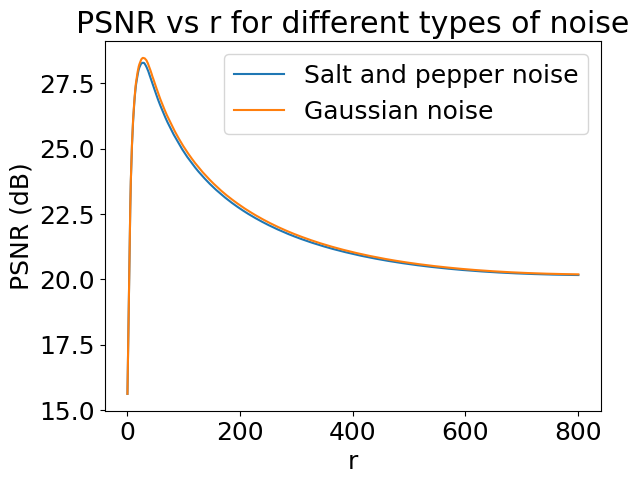

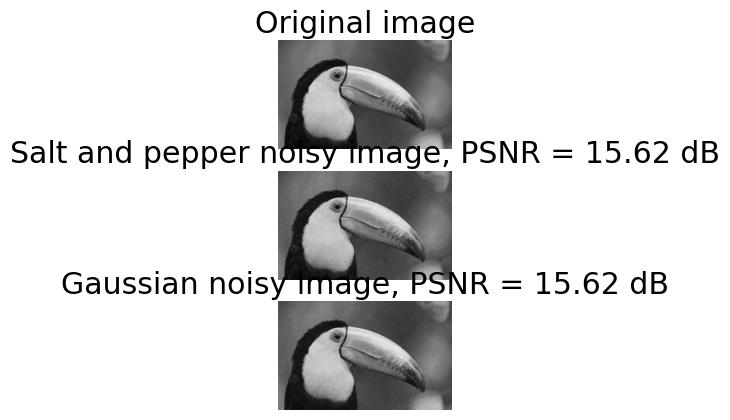

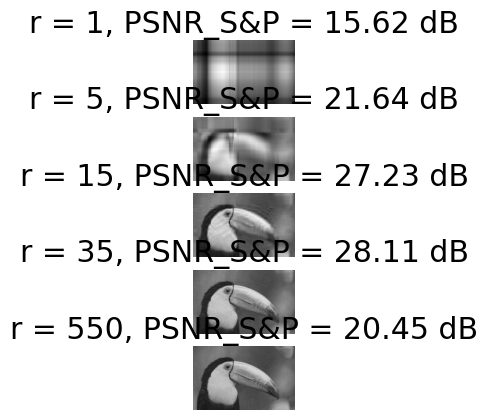

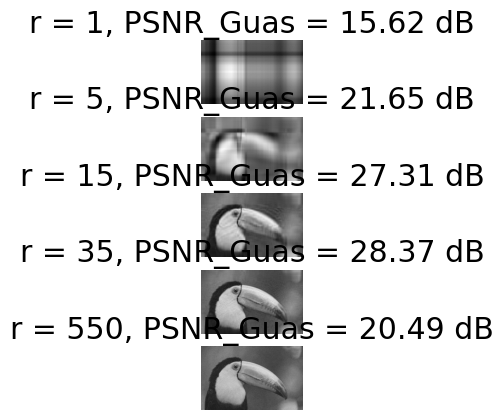

In [40]:
##Your Code start here
from skimage import io, color, util, restoration

img = io.imread('pic.jpg')
img = color.rgb2gray(img)
# salt and pepper noise
img_sp = util.random_noise(img, mode='s&p', amount=0.032)
# Gaussian noise
img_g = util.random_noise(img, mode='gaussian', var=0.01)

mse_sp = np.mean((img - img_sp) ** 2)
psnr_sp = 10 * np.log10(1 / mse_sp)
mse_g = np.mean((img - img_g) ** 2)
psnr_g = 10 * np.log10(1 / mse_g)
print(f'PSNR of salt and pepper noisy image: {psnr_sp:.2f} dB')
print(f'PSNR of Gaussian noisy image: {psnr_g:.2f} dB')

# Perform SVD on the noisy image matrices
U_sp, S_sp, V_sp = np.linalg.svd(img_sp)
U_g, S_g, V_g = np.linalg.svd(img_g)

# Initialize empty lists to store the PSNR values
psnr_list_sp = []
psnr_list_g = []

# Loop over the values of r from 1 to the rank of the image matrix
for r in range(1, min(U_sp.shape[1], V_sp.shape[0]) + 1):
    # salt and pepper
    U_r_sp = U_sp[:, :r]
    S_r_sp = np.diag(S_sp[:r])
    V_r_sp = V_sp[:r, :]
    img_r_sp = U_r_sp @ S_r_sp @ V_r_sp
    mse_sp = np.mean((img - img_r_sp) ** 2)
    psnr_sp = 10 * np.log10(1 / mse_sp)
    psnr_list_sp.append(psnr_sp)
    # Gaussian
    U_r_g = U_g[:, :r]
    S_r_g = np.diag(S_g[:r])
    V_r_g = V_g[:r, :]
    img_r_g = U_r_g @ S_r_g @ V_r_g
    mse_g = np.mean((img - img_r_g) ** 2)
    psnr_g = 10 * np.log10(1 / mse_g)
    psnr_list_g.append(psnr_g)

plt.plot(range(1, len(psnr_list_sp) + 1), psnr_list_sp, label='Salt and pepper noise')
plt.plot(range(1, len(psnr_list_g) + 1), psnr_list_g, label='Gaussian noise')
plt.xlabel('r')
plt.ylabel('PSNR (dB)')
plt.title('PSNR vs r for different types of noise')
plt.legend()
plt.show()

r_values = [1, 5, 15, 35, 550]
plt.figure()
plt.subplot(3, 1, 1)
plt.imshow(img, cmap='gray')
plt.title('Original image')
plt.axis('off')
plt.subplot(3, 1, 2)
plt.imshow(img_sp, cmap='gray')
plt.title(f'Salt and pepper noisy image, PSNR = {psnr_list_sp[0]:.2f} dB')
plt.axis('off')
plt.subplot(3, 1, 3)
plt.imshow(img_g, cmap='gray')
plt.title(f'Gaussian noisy image, PSNR = {psnr_list_g[0]:.2f} dB')
plt.axis('off')
plt.figure()
for i, r in enumerate(r_values):
    U_r_sp = U_sp[:, :r]
    S_r_sp = np.diag(S_sp[:r])
    V_r_sp = V_sp[:r, :]
    img_r_sp = U_r_sp @ S_r_sp @ V_r_sp
    plt.subplot(5, 1, i + 1)
    plt.imshow(img_r_sp, cmap='gray')
    plt.title(f'r = {r}, PSNR_S&P = {psnr_list_sp[r-1]:.2f} dB')
    plt.axis('off')
plt.show()
plt.figure()
for i, r in enumerate(r_values):
    U_r_g = U_g[:, :r]
    S_r_g = np.diag(S_g[:r])
    V_r_g = V_g[:r, :]
    img_r_g = U_r_g @ S_r_g @ V_r_g
    plt.subplot(5, 1, i + 1)
    plt.imshow(img_r_g, cmap='gray')
    plt.title(f'r = {r}, PSNR_Guas = {psnr_list_g[r-1]:.2f} dB')
    plt.axis('off')
plt.show()
##Your Code ends here

##  Q3. PCA and Clustering <sub><sup>``(40 pt.)``</sup></sub>
In this problem we want to cluster some data points.
But first, you should reduce the number of features by the PCA algorithm then use kmeans clustering algorithm

In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
from tqdm import tqdm
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score as sil, calinski_harabasz_score as chs, silhouette_samples

### Import Dataset

In [43]:
Datapoint = pd.read_csv('Datapoint.csv',header=None)


### Correlation Heatmap

In this part plot the correlation Heatmap of features.
What is your suggestion about the number of principal components that they have high variance? Explain why.

Answer:

If a row or column have similar high numbers in their intersection (like numbers 5 & 6) or have similar numbers with other rows or colmuns, we can assume that we can 'merge' them.

For that, I guess the number is 13-2=11.

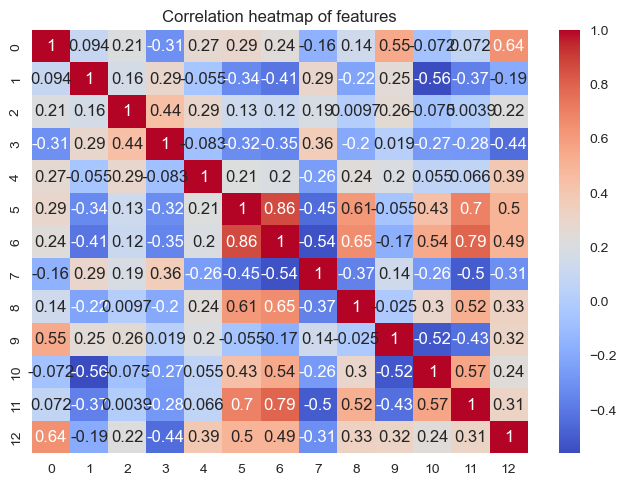

In [44]:
##Your Code start here
corr = Datapoint.corr()

sns.heatmap(corr, cmap='coolwarm', annot=True)
plt.title('Correlation heatmap of features')
plt.show()
##Your Code ends here

###  Data Preprocessing

In [45]:
Datapoint.head(179) # for all rows

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


### PCA (Principal Component Analysis)
> As you know for applying PCA we should scale our data points.Here we use MinMax and Standard Scaler.
(First, use Standard Scaler)

Calculate principal components and plot Explained variance by each component.

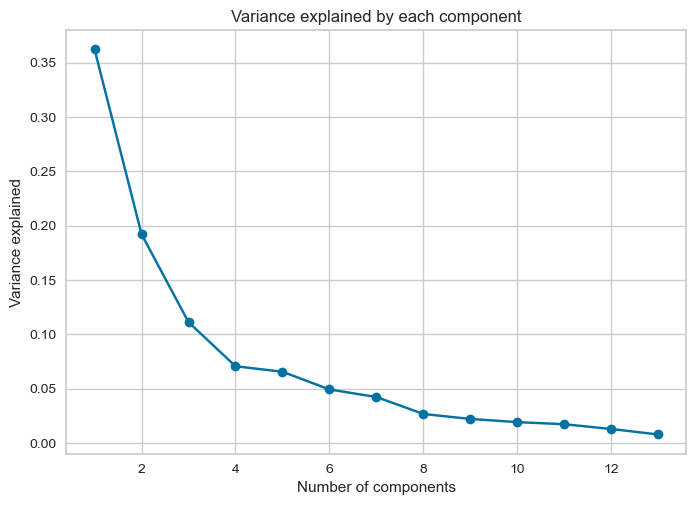

In [46]:
##Your Code start here
# Scale the data points using StandardScaler
scaler = StandardScaler()
scaled_df = scaler.fit_transform(Datapoint)

# Perform PCA on the scaled data
pca = PCA(n_components=None) # choose the number of components
pca.fit(scaled_df) # fit the PCA object on the scaled data

# Plot the explained variance by each component
plt.plot(range(1, pca.n_components_ + 1), pca.explained_variance_ratio_, marker='o')
plt.xlabel('Number of components')
plt.ylabel('Variance explained')
plt.title('Variance explained by each component')
plt.show()
##Your Code ends here

Apply PCA Algorithm from scratch and reduce the number of features to the number you have guessed in previous parts.

In [47]:
##Your Code start here

# Calculate the covariance matrix of the scaled data
cov_mat = np.cov(scaled_df.T)

# Calculate the eigenvalues and eigenvectors of the covariance matrix
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

# Sort the eigenvalues and eigenvectors in descending order
sorted_index = np.argsort(eig_vals)[::-1]
sorted_eigvals = eig_vals[sorted_index]
sorted_eigvecs = eig_vecs[:, sorted_index]

# Choose the number of components to keep
num_components = 11 # set the number of components to 11
print(f'Number of components: {num_components}')

# Select the first 12 eigenvectors as the new basis
pca_components = sorted_eigvecs[:, :num_components]

# Project the scaled data onto the new basis
pca_data_df = np.dot(scaled_df, pca_components)
##Your Code ends here

Number of components: 11


### PCA plot in 2D
Plot data points using their two first features.What do you think about the number of clusters?

Answer:

3 to 4 clusters.

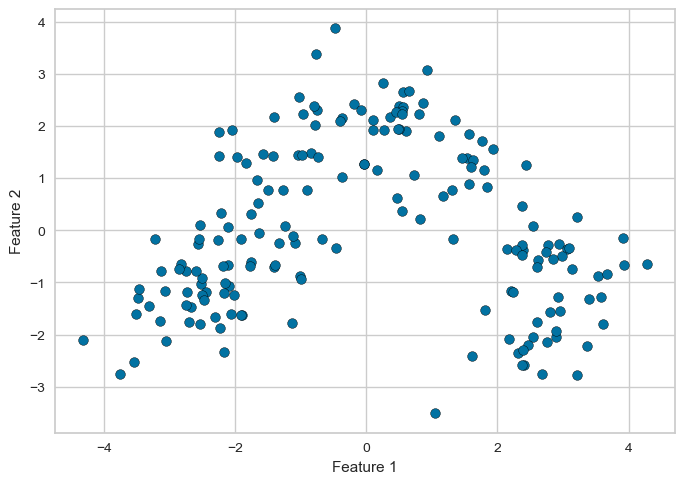

In [48]:
##Your Code start here
plt.scatter(pca_data_df[:, 0], pca_data_df[:, 1], edgecolors='black')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()
##Your Code ends here

### Do all previous steps for MinMax Scaling
Tell your opinion about diffrences.


First the range is different: in MinMax scaling the range is usually between 0 & 1. But in Standard scaling does not have a fixed range.

Second Standard scaling changes the data to have zero mean and have deviation of one. In MinMax scaling mean and deviation does not have to be a fixed number.

Third MinMax scaling is good when the range is limited like neural networks but Standard scaling is good when we need to assume normality like linear regression.

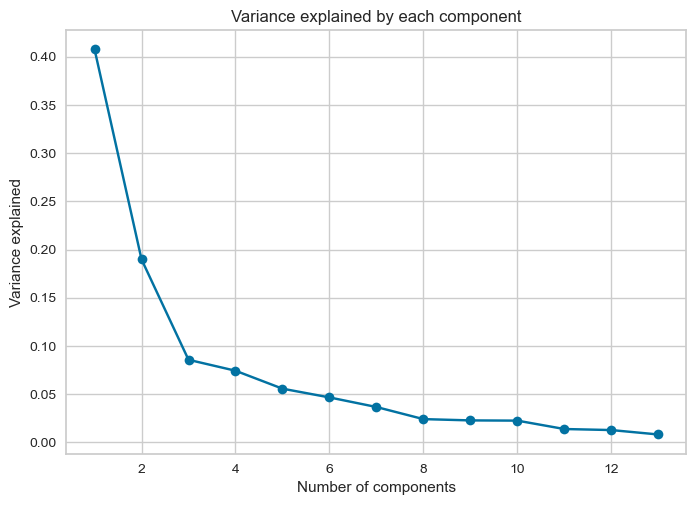

Number of components: 11


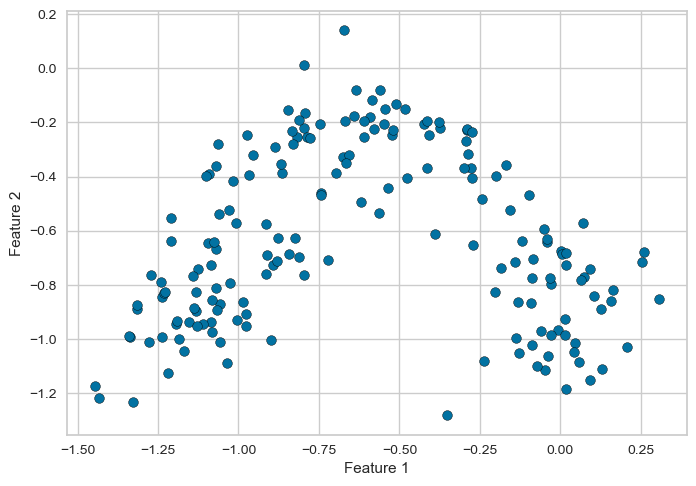

In [50]:
##Your Code start here
scaler = MinMaxScaler()
scaled_mm = scaler.fit_transform(Datapoint)

# Perform PCA on the scaled data
pca = PCA(n_components=None) # choose the number of components
pca.fit(scaled_mm) # fit the PCA object on the scaled data

# Plot the explained variance by each component
plt.plot(range(1, pca.n_components_ + 1), pca.explained_variance_ratio_, marker='o')
plt.xlabel('Number of components')
plt.ylabel('Variance explained')
plt.title('Variance explained by each component')
plt.show()

# Calculate the covariance matrix of the scaled data
cov_mat = np.cov(scaled_mm.T)

# Calculate the eigenvalues and eigenvectors of the covariance matrix
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

# Sort the eigenvalues and eigenvectors in descending order
sorted_index = np.argsort(eig_vals)[::-1]
sorted_eigvals = eig_vals[sorted_index]
sorted_eigvecs = eig_vecs[:, sorted_index]

# Choose the number of components to keep
num_components = 11 # set the number of components to 11
print(f'Number of components: {num_components}')

# Select the first 12 eigenvectors as the new basis
pca_components = sorted_eigvecs[:, :num_components]

# Project the scaled data onto the new basis
pca_data_mm = np.dot(scaled_mm, pca_components)

plt.scatter(pca_data_mm[:, 0], pca_data_mm[:, 1], edgecolors='black')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()
##Your Code ends here

### KMeans Clustering
#### Elbow Method for Determining Cluster Amount on  Dataset

Using the elbow method to find the optimal number of clusters

C:\Users\Microsoft\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


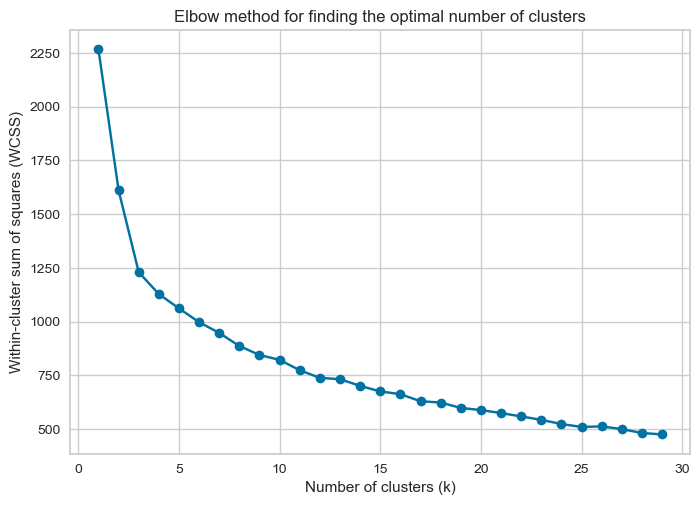

In [51]:
##Your Code start here

# WCSS stands for within-cluster sum of squares,
# which is a measure of how compact the clusters are in a clustering algorithm.
# It calculates the sum of the squared distances between each point and the centroid of the cluster it belongs to.

# Choose a range of values for k
k_values = range(1, 30)

# Initialize an empty list to store the WCSS values
wcss_values = []

# Loop over the k values
for k in k_values:
    # Create a k-means object with k clusters
    kmeans = KMeans(n_clusters=k)
    # Fit the k-means object to the data
    kmeans.fit(pca_data_df)
    # Append the WCSS value to the list
    wcss_values.append(kmeans.inertia_)

# Plot the WCSS values against the k values
plt.plot(k_values, wcss_values, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Within-cluster sum of squares (WCSS)')
plt.title('Elbow method for finding the optimal number of clusters')
plt.show()
##Your Code ends here

What is inertia and silhouette metrics?
Explain them briefly.


Inertia is the sum of the squared distances between each data point and the centroid of the cluster it belongs to. It measures how cohesive the clusters are, or how close the data points are to their cluster centers. The lower the inertia, the better the clustering.

On the other hand Silhouette is the average of the silhouette coefficients for each data point. The silhouette coefficient is a measure of how well a data point fits in its cluster compared to other clusters. It is calculated as the difference between the average distance to the nearest cluster and the average distance to the cluster it belongs to, divided by the maximum of these two distances. The silhouette coefficient ranges from -1 to 1, where 1 means the data point is very similar to its cluster and very dissimilar to other clusters, 0 means the data point is on the border of two clusters, and -1 means the data point is assigned to the wrong cluster.

In [52]:
pca_std_datapoint = pca_data_df
#You should save your final datapoints in pca_std_datapoint variable
inertia = []
for i in tqdm(range(2,10)):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=15, max_iter= 500, random_state=17)
    kmeans.fit(pca_std_datapoint)
    inertia.append(kmeans.inertia_)

100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 26.84it/s]


In [53]:
silhouette = {}
for i in tqdm(range(2,10)):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=15, max_iter=500, random_state=17)
    kmeans.fit(pca_std_datapoint)
    silhouette[i] = sil(pca_std_datapoint, kmeans.labels_, metric='euclidean')

100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 25.82it/s]


Plot the **inertia** and **silhouette** values

Text(0.5, 1.0, 'Silhouette Score for Number of Clusters')

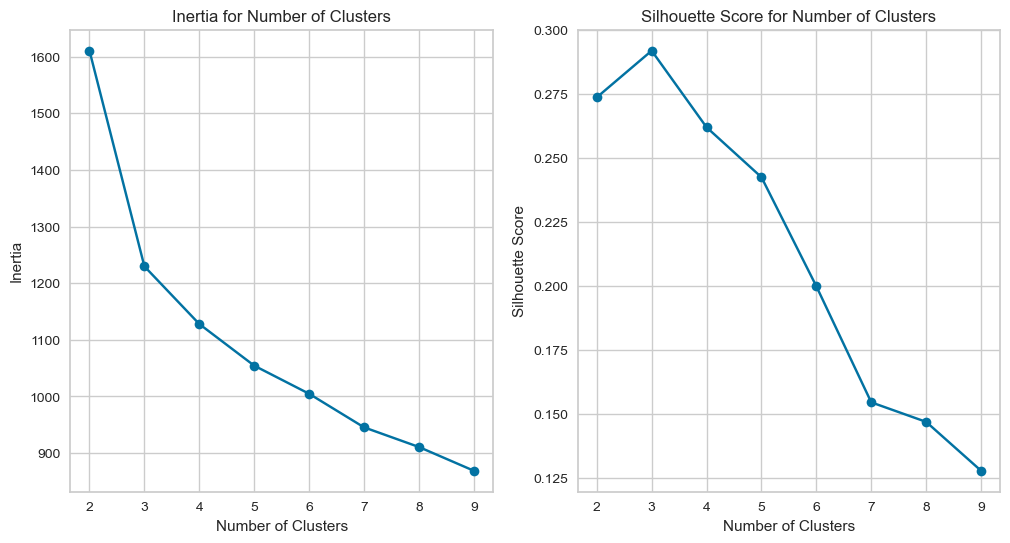

In [54]:
##Your Code start here
# inertia
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(2, 10), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Inertia for Number of Clusters')

# silhouette
plt.subplot(1, 2, 2)
plt.plot(silhouette.keys(), silhouette.values(), marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Number of Clusters')
##Your Code ends here

Tune the hyper parameters based on your conclusions.

With try and error, I reached the conclusion that n_cluster = 3.

In [55]:
model_kmeans = KMeans(n_clusters = 3, random_state = 0, init='k-means++')
y_predict_kmeans1 = model_kmeans.fit_predict(pca_std_datapoint)


Now plot the datapoints using two first features
(Each cluster in a different colour)

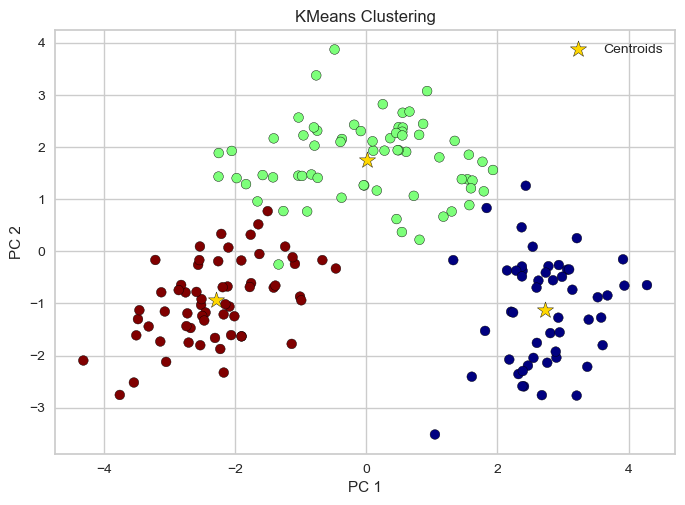

In [56]:
plt.scatter(pca_std_datapoint[:, 0], pca_std_datapoint[:, 1], c=y_predict_kmeans1, cmap="jet", edgecolors='black')
plt.scatter(model_kmeans.cluster_centers_[:, 0], model_kmeans.cluster_centers_[:, 1], marker='*', s=150, color='Gold', label='Centroids', edgecolors='black')
plt.title('KMeans Clustering')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend()
plt.show()

Do all previous steps for MinMax scaled data points.





C:\Users\Microsoft\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


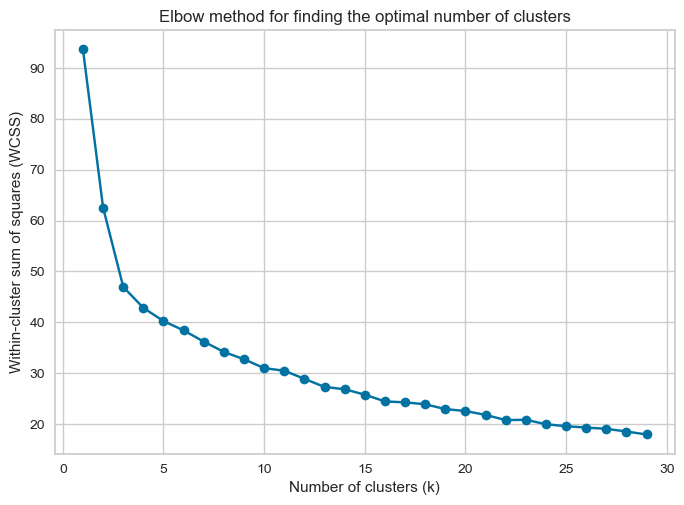

100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 24.91it/s]


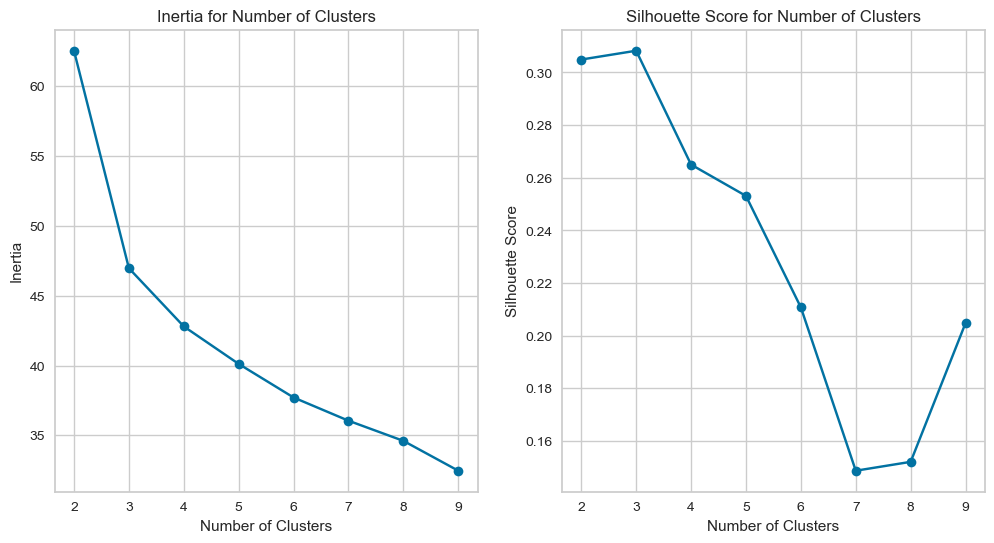

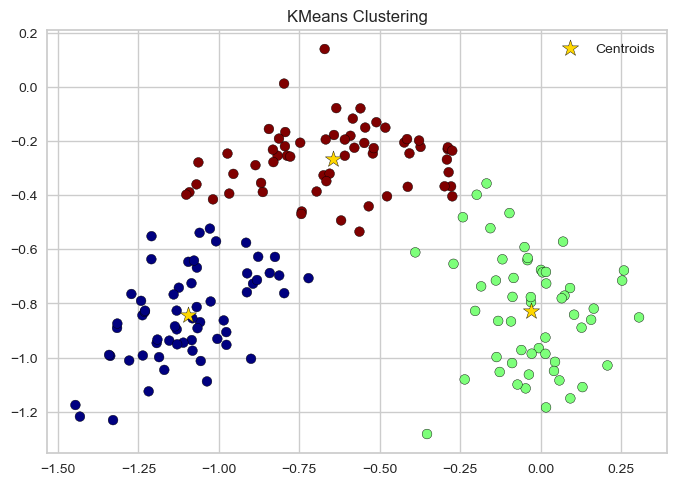

In [57]:
# Part 0

# Choose a range of values for k
k_values = range(1, 30)
# Initialize an empty list to store the WCSS values
wcss_values = []
# Loop over the k values
for k in k_values:
    # Create a k-means object with k clusters
    kmeans = KMeans(n_clusters=k)
    # Fit the k-means object to the data
    kmeans.fit(pca_data_mm)
    # Append the WCSS value to the list
    wcss_values.append(kmeans.inertia_)
# Plot the WCSS values against the k values
plt.plot(k_values, wcss_values, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Within-cluster sum of squares (WCSS)')
plt.title('Elbow method for finding the optimal number of clusters')
plt.show()

# Part 1
pca_std_datapoint = pca_data_mm
#You should save your final datapoints in pca_std_datapoint variable
inertia = []
for i in tqdm(range(2,10)):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=15, max_iter= 500, random_state=17)
    kmeans.fit(pca_std_datapoint)
    inertia.append(kmeans.inertia_)

# Part 2
silhouette = {}
for i in tqdm(range(2,10)):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=15, max_iter=500, random_state=17)
    kmeans.fit(pca_std_datapoint)
    silhouette[i] = sil(pca_std_datapoint, kmeans.labels_, metric='euclidean')
    
# Part 3
# inertia
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(2, 10), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Inertia for Number of Clusters')
# silhouette
plt.subplot(1, 2, 2)
plt.plot(silhouette.keys(), silhouette.values(), marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Number of Clusters')

# Part 4
model_kmeans = KMeans(n_clusters = 3, random_state = 0, init='k-means++')
y_predict_kmeans1 = model_kmeans.fit_predict(pca_std_datapoint)

# Part 5
plt.figure()
plt.scatter(pca_std_datapoint[:, 0], pca_std_datapoint[:, 1], c=y_predict_kmeans1, cmap="jet", edgecolors='black')
plt.scatter(model_kmeans.cluster_centers_[:, 0], model_kmeans.cluster_centers_[:, 1], marker='*', s=150, color='Gold', label='Centroids', edgecolors='black')
plt.title('KMeans Clustering')
plt.legend()
plt.show()

Compare the results of different scaling methods in a PCA problem

As we can see in MinMax scaling the 3 different clusters are completely distinct and have easier for eye (!) seperation to see them. But in Standard scaling, 2 of these 3 clusters are inside each other.

Other difference that can be seen is that in MinMax scaling datas are closer to the center. But in Standard scaling they are more scatered.